# Python file for creating plots for report

## Setup

In [2]:
import os
import seaborn
import numpy as np
import matplotlib.pyplot as plt

## Object detectors

Mean average precision plots

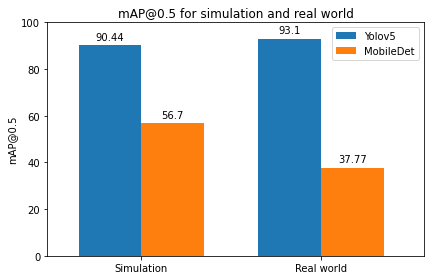

In [11]:
map_yolov5_real = 93.10
map_yolov5_sim = 90.44
map_mobiledet_sim = 56.70
map_mobiledet_real = 37.77

labels = ['Simulation', 'Real world']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [map_yolov5_sim, map_yolov5_real], width, label='Yolov5')
rects2 = ax.bar(x + width/2, [map_mobiledet_sim, map_mobiledet_real], width, label='MobileDet')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('mAP@0.5')
ax.set_title('mAP@0.5 for simulation and real world')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.ylim([0.0, 100.0])
plt.xlim([-1.5*width, 4.5*width])
plt.savefig('assets/map_object_detectors.png')
plt.show()

True positives vs. false positives

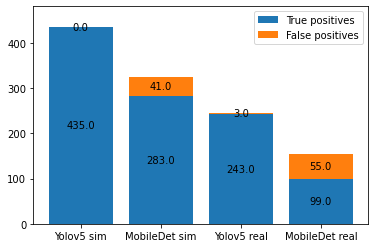

In [26]:
total_object_real = 261
map_yolov5_real = [243, 3]
map_mobiledet_real = [99, 55]

total_objects_sim = 481
map_yolov5_sim = [435, 0]
map_mobiledet_sim = [283, 41]

def plot_stacked_bar(data, series_labels, category_labels=None, 
                     show_values=False, value_format="{}", y_label=None, 
                     colors=None, grid=False, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    colors          -- List of color labels
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], color=color))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)

    plt.legend()

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")
                
series_labels = ['True positives', 'False positives']

data = [
    [map_yolov5_sim[0], map_mobiledet_sim[0], map_yolov5_real[0], map_mobiledet_real[0]],
    [map_yolov5_sim[1], map_mobiledet_sim[1], map_yolov5_real[1], map_mobiledet_real[1]]
]

category_labels = ['Yolov5 sim', 'MobileDet sim', 'Yolov5 real', 'MobileDet real']

plot_stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels, 
    show_values=True, 
    value_format="{:.1f}",
    y_label=""
)

plt.ylim([0.0, 481.0])
plt.savefig('assets/tp_fp_object_detectors.png')
plt.show()

Precision recall curve

In [ ]:
map_yolov5_real = [
    ['1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.99', '0.99']
    ['0.00', '0.01', '0.01', '0.02', '0.02', '0.02', '0.03', '0.03', '0.03', '0.04', '0.04', '0.05', '0.05', '0.05', '0.06', '0.06', '0.07', '0.07', '0.07', '0.08', '0.08', '0.08', '0.09', '0.09', '0.10', '0.10', '0.10', '0.11', '0.11', '0.11', '0.12', '0.12', '0.13', '0.13', '0.13', '0.14', '0.14', '0.15', '0.15', '0.15', '0.16', '0.16', '0.16', '0.17', '0.17', '0.18', '0.18', '0.18', '0.19', '0.19', '0.20', '0.20', '0.20', '0.21', '0.21', '0.21', '0.22', '0.22', '0.23', '0.23', '0.23', '0.24', '0.24', '0.25', '0.25', '0.25', '0.26', '0.26', '0.26', '0.27', '0.27', '0.28', '0.28', '0.28', '0.29', '0.29', '0.30', '0.30', '0.30', '0.31', '0.31', '0.31', '0.32', '0.32', '0.33', '0.33', '0.33', '0.34', '0.34', '0.34', '0.35', '0.35', '0.36', '0.36', '0.36', '0.37', '0.37', '0.38', '0.38', '0.38', '0.39', '0.39', '0.39', '0.40', '0.40', '0.41', '0.41', '0.41', '0.42', '0.42', '0.43', '0.43', '0.43', '0.44', '0.44', '0.44', '0.45', '0.45', '0.46', '0.46', '0.46', '0.47', '0.47', '0.48', '0.48', '0.48', '0.49', '0.49', '0.49', '0.50', '0.50', '0.51', '0.51', '0.51', '0.52', '0.52', '0.52', '0.53', '0.53', '0.54', '0.54', '0.54', '0.55', '0.55', '0.56', '0.56', '0.56', '0.57', '0.57', '0.57', '0.58', '0.58', '0.59', '0.59', '0.59', '0.60', '0.60', '0.61', '0.61', '0.61', '0.62', '0.62', '0.62', '0.63', '0.63', '0.64', '0.64', '0.64', '0.65', '0.65', '0.66', '0.66', '0.66', '0.67', '0.67', '0.67', '0.68', '0.68', '0.69', '0.69', '0.69', '0.70', '0.70', '0.70', '0.71', '0.71', '0.72', '0.72', '0.72', '0.73', '0.73', '0.74', '0.74', '0.74', '0.75', '0.75', '0.75', '0.76', '0.76', '0.77', '0.77', '0.77', '0.78', '0.78', '0.79', '0.79', '0.79', '0.80', '0.80', '0.80', '0.81', '0.81', '0.82', '0.82', '0.82', '0.83', '0.83', '0.84', '0.84', '0.84', '0.85', '0.85', '0.85', '0.86', '0.86', '0.87', '0.87', '0.87', '0.88', '0.88', '0.89', '0.89', '0.89', '0.90', '0.90', '0.90', '0.91', '0.91', '0.92', '0.92', '0.92', '0.93', '0.93', '0.93', '0.93', '0.93']
]
map_yolov5_sim = [
    ['1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00']
    ['0.00', '0.00', '0.01', '0.01', '0.01', '0.01', '0.01', '0.02', '0.02', '0.02', '0.02', '0.02', '0.03', '0.03', '0.03', '0.03', '0.04', '0.04', '0.04', '0.04', '0.04', '0.05', '0.05', '0.05', '0.05', '0.05', '0.06', '0.06', '0.06', '0.06', '0.06', '0.07', '0.07', '0.07', '0.07', '0.07', '0.08', '0.08', '0.08', '0.08', '0.09', '0.09', '0.09', '0.09', '0.09', '0.10', '0.10', '0.10', '0.10', '0.10', '0.11', '0.11', '0.11', '0.11', '0.11', '0.12', '0.12', '0.12', '0.12', '0.12', '0.13', '0.13', '0.13', '0.13', '0.14', '0.14', '0.14', '0.14', '0.14', '0.15', '0.15', '0.15', '0.15', '0.15', '0.16', '0.16', '0.16', '0.16', '0.16', '0.17', '0.17', '0.17', '0.17', '0.17', '0.18', '0.18', '0.18', '0.18', '0.19', '0.19', '0.19', '0.19', '0.19', '0.20', '0.20', '0.20', '0.20', '0.20', '0.21', '0.21', '0.21', '0.21', '0.21', '0.22', '0.22', '0.22', '0.22', '0.22', '0.23', '0.23', '0.23', '0.23', '0.23', '0.24', '0.24', '0.24', '0.24', '0.25', '0.25', '0.25', '0.25', '0.25', '0.26', '0.26', '0.26', '0.26', '0.26', '0.27', '0.27', '0.27', '0.27', '0.27', '0.28', '0.28', '0.28', '0.28', '0.28', '0.29', '0.29', '0.29', '0.29', '0.30', '0.30', '0.30', '0.30', '0.30', '0.31', '0.31', '0.31', '0.31', '0.31', '0.32', '0.32', '0.32', '0.32', '0.32', '0.33', '0.33', '0.33', '0.33', '0.33', '0.34', '0.34', '0.34', '0.34', '0.35', '0.35', '0.35', '0.35', '0.35', '0.36', '0.36', '0.36', '0.36', '0.36', '0.37', '0.37', '0.37', '0.37', '0.37', '0.38', '0.38', '0.38', '0.38', '0.38', '0.39', '0.39', '0.39', '0.39', '0.40', '0.40', '0.40', '0.40', '0.40', '0.41', '0.41', '0.41', '0.41', '0.41', '0.42', '0.42', '0.42', '0.42', '0.42', '0.43', '0.43', '0.43', '0.43', '0.43', '0.44', '0.44', '0.44', '0.44', '0.44', '0.45', '0.45', '0.45', '0.45', '0.46', '0.46', '0.46', '0.46', '0.46', '0.47', '0.47', '0.47', '0.47', '0.47', '0.48', '0.48', '0.48', '0.48', '0.48', '0.49', '0.49', '0.49', '0.49', '0.49', '0.50', '0.50', '0.50', '0.50', '0.51', '0.51', '0.51', '0.51', '0.51', '0.52', '0.52', '0.52', '0.52', '0.52', '0.53', '0.53', '0.53', '0.53', '0.53', '0.54', '0.54', '0.54', '0.54', '0.54', '0.55', '0.55', '0.55', '0.55', '0.56', '0.56', '0.56', '0.56', '0.56', '0.57', '0.57', '0.57', '0.57', '0.57', '0.58', '0.58', '0.58', '0.58', '0.58', '0.59', '0.59', '0.59', '0.59', '0.59', '0.60', '0.60', '0.60', '0.60', '0.60', '0.61', '0.61', '0.61', '0.61', '0.62', '0.62', '0.62', '0.62', '0.62', '0.63', '0.63', '0.63', '0.63', '0.63', '0.64', '0.64', '0.64', '0.64', '0.64', '0.65', '0.65', '0.65', '0.65', '0.65', '0.66', '0.66', '0.66', '0.66', '0.67', '0.67', '0.67', '0.67', '0.67', '0.68', '0.68', '0.68', '0.68', '0.68', '0.69', '0.69', '0.69', '0.69', '0.69', '0.70', '0.70', '0.70', '0.70', '0.70', '0.71', '0.71', '0.71', '0.71', '0.72', '0.72', '0.72', '0.72', '0.72', '0.73', '0.73', '0.73', '0.73', '0.73', '0.74', '0.74', '0.74', '0.74', '0.74', '0.75', '0.75', '0.75', '0.75', '0.75', '0.76', '0.76', '0.76', '0.76', '0.77', '0.77', '0.77', '0.77', '0.77', '0.78', '0.78', '0.78', '0.78', '0.78', '0.79', '0.79', '0.79', '0.79', '0.79', '0.80', '0.80', '0.80', '0.80', '0.80', '0.81', '0.81', '0.81', '0.81', '0.81', '0.82', '0.82', '0.82', '0.82', '0.83', '0.83', '0.83', '0.83', '0.83', '0.84', '0.84', '0.84', '0.84', '0.84', '0.85', '0.85', '0.85', '0.85', '0.85', '0.86', '0.86', '0.86', '0.86', '0.86', '0.87', '0.87', '0.87', '0.87', '0.88', '0.88', '0.88', '0.88', '0.88', '0.89', '0.89', '0.89', '0.89', '0.89', '0.90', '0.90', '0.90', '0.90', '0.90']
]
map_mobiledet_sim = [
    ['1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.98', '0.96', '0.95', '0.93', '0.93', '0.93', '0.93', '0.93', '0.93', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.93', '0.92', '0.90', '0.89', '0.88', '0.88', '0.88', '0.88', '0.89', '0.89', '0.89', '0.89', '0.89', '0.89', '0.89', '0.90', '0.90', '0.90', '0.90', '0.90', '0.90', '0.90', '0.90', '0.90', '0.91', '0.91', '0.91', '0.91', '0.91', '0.91', '0.91', '0.91', '0.91', '0.91', '0.91', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.91', '0.91', '0.91', '0.91', '0.91', '0.91', '0.91', '0.91', '0.91', '0.91', '0.91', '0.91', '0.91', '0.91', '0.91', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.92', '0.93', '0.93', '0.93', '0.93', '0.93', '0.93', '0.93', '0.93', '0.93', '0.93', '0.93', '0.93', '0.93', '0.93', '0.93', '0.93', '0.93', '0.93', '0.93', '0.93', '0.93', '0.93', '0.93', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.94', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.95', '0.96', '0.96', '0.96', '0.96', '0.96', '0.96', '0.96', '0.95', '0.95', '0.95', '0.94', '0.94', '0.94', '0.93', '0.93', '0.93', '0.92', '0.92', '0.92', '0.92', '0.91', '0.91', '0.91', '0.90', '0.90', '0.90', '0.90', '0.89', '0.89', '0.89', '0.88', '0.88', '0.88', '0.88', '0.88', '0.87']
    ['0.00', '0.00', '0.01', '0.01', '0.01', '0.01', '0.01', '0.02', '0.02', '0.02', '0.02', '0.02', '0.03', '0.03', '0.03', '0.03', '0.04', '0.04', '0.04', '0.04', '0.04', '0.05', '0.05', '0.05', '0.05', '0.05', '0.06', '0.06', '0.06', '0.06', '0.06', '0.07', '0.07', '0.07', '0.07', '0.07', '0.08', '0.08', '0.08', '0.08', '0.09', '0.09', '0.09', '0.09', '0.09', '0.10', '0.10', '0.10', '0.10', '0.10', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.11', '0.12', '0.12', '0.12', '0.12', '0.12', '0.13', '0.13', '0.13', '0.13', '0.14', '0.14', '0.14', '0.14', '0.14', '0.14', '0.14', '0.14', '0.14', '0.14', '0.15', '0.15', '0.15', '0.15', '0.15', '0.16', '0.16', '0.16', '0.16', '0.16', '0.17', '0.17', '0.17', '0.17', '0.17', '0.18', '0.18', '0.18', '0.18', '0.19', '0.19', '0.19', '0.19', '0.19', '0.20', '0.20', '0.20', '0.20', '0.20', '0.21', '0.21', '0.21', '0.21', '0.21', '0.22', '0.22', '0.22', '0.22', '0.22', '0.22', '0.22', '0.23', '0.23', '0.23', '0.23', '0.23', '0.24', '0.24', '0.24', '0.24', '0.25', '0.25', '0.25', '0.25', '0.25', '0.26', '0.26', '0.26', '0.26', '0.26', '0.27', '0.27', '0.27', '0.27', '0.27', '0.28', '0.28', '0.28', '0.28', '0.28', '0.29', '0.29', '0.29', '0.29', '0.30', '0.30', '0.30', '0.30', '0.30', '0.31', '0.31', '0.31', '0.31', '0.31', '0.32', '0.32', '0.32', '0.32', '0.32', '0.33', '0.33', '0.33', '0.33', '0.33', '0.34', '0.34', '0.34', '0.34', '0.35', '0.35', '0.35', '0.35', '0.35', '0.36', '0.36', '0.36', '0.36', '0.36', '0.37', '0.37', '0.37', '0.37', '0.37', '0.38', '0.38', '0.38', '0.38', '0.38', '0.39', '0.39', '0.39', '0.39', '0.39', '0.40', '0.40', '0.40', '0.40', '0.40', '0.40', '0.41', '0.41', '0.41', '0.41', '0.41', '0.42', '0.42', '0.42', '0.42', '0.42', '0.43', '0.43', '0.43', '0.43', '0.43', '0.44', '0.44', '0.44', '0.44', '0.44', '0.45', '0.45', '0.45', '0.45', '0.46', '0.46', '0.46', '0.46', '0.46', '0.47', '0.47', '0.47', '0.47', '0.47', '0.48', '0.48', '0.48', '0.48', '0.48', '0.49', '0.49', '0.49', '0.49', '0.49', '0.50', '0.50', '0.50', '0.50', '0.51', '0.51', '0.51', '0.51', '0.51', '0.52', '0.52', '0.52', '0.52', '0.52', '0.53', '0.53', '0.53', '0.53', '0.53', '0.54', '0.54', '0.54', '0.54', '0.54', '0.55', '0.55', '0.55', '0.55', '0.56', '0.56', '0.56', '0.56', '0.56', '0.57', '0.57', '0.57', '0.57', '0.57', '0.58', '0.58', '0.58', '0.58', '0.58', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59', '0.59']
]
map_mobiledet_real = [
    ['1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '1.00', '0.99', '0.99', '0.99', '0.99', '0.98', '0.98', '0.98', '0.98', '0.97', '0.97', '0.97', '0.96', '0.95', '0.94', '0.93', '0.92', '0.92', '0.91', '0.90', '0.89', '0.88', '0.88', '0.87', '0.86', '0.85', '0.84', '0.84', '0.83', '0.82', '0.82', '0.81', '0.80', '0.80', '0.79', '0.78', '0.78', '0.77', '0.77', '0.76', '0.75', '0.75', '0.74', '0.74', '0.73', '0.73', '0.73', '0.72', '0.72', '0.71', '0.71', '0.70', '0.70', '0.69', '0.69', '0.68', '0.68', '0.67', '0.67', '0.66', '0.66', '0.66', '0.65', '0.65', '0.64']
    ['0.00', '0.01', '0.01', '0.02', '0.02', '0.02', '0.03', '0.03', '0.03', '0.04', '0.04', '0.05', '0.05', '0.05', '0.06', '0.06', '0.07', '0.07', '0.07', '0.08', '0.08', '0.08', '0.09', '0.09', '0.10', '0.10', '0.10', '0.11', '0.11', '0.11', '0.12', '0.12', '0.13', '0.13', '0.13', '0.14', '0.14', '0.15', '0.15', '0.15', '0.16', '0.16', '0.16', '0.17', '0.17', '0.18', '0.18', '0.18', '0.19', '0.19', '0.20', '0.20', '0.20', '0.21', '0.21', '0.21', '0.22', '0.22', '0.23', '0.23', '0.23', '0.24', '0.24', '0.25', '0.25', '0.25', '0.26', '0.26', '0.26', '0.27', '0.27', '0.28', '0.28', '0.28', '0.29', '0.29', '0.30', '0.30', '0.30', '0.31', '0.31', '0.31', '0.32', '0.32', '0.33', '0.33', '0.33', '0.34', '0.34', '0.34', '0.34', '0.35', '0.35', '0.36', '0.36', '0.36', '0.36', '0.37', '0.37', '0.37', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38', '0.38']
]